<a href="https://colab.research.google.com/github/hetielle/CovidSurvivalPrediction/blob/main/gb-smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/covid19/dados_finais.pkl')

#só alterei a ordem das colunas, deixando a evolucao por ultimo pq é mais facil de entender
df = df[['sem_pri', 'co_mun_not', 'co_mun_res', 'cs_raca', 'cs_escol_n',
       'cs_zona', 'vacina_cov', 'calc_idade', 'qnt_comorbidades',
       'qnt_sintomas', 'co_uni_not', 'ESPVIDA', 'SOBRE60', 'GINI', 'PIND',
       'RDPC', 'THEIL', 'IDHM', 'pesotot', 'pesoRUR', 'pesourb', 'capital_res',
       'capital_not', 'tot_vacinados_acum', 'leitos', 'publico', 'casos',
       'lotacao', 'distancia', 'perc_vac', 'sg_uf_not_cat', 'sg_uf_cat',
       'cs_sexo_cat', 'evolucao']]

In [ ]:
df.columns

Index(['sem_pri', 'co_mun_not', 'co_mun_res', 'cs_raca', 'cs_escol_n',
       'cs_zona', 'vacina_cov', 'calc_idade', 'qnt_comorbidades',
       'qnt_sintomas', 'co_uni_not', 'ESPVIDA', 'SOBRE60', 'GINI', 'PIND',
       'RDPC', 'THEIL', 'IDHM', 'pesotot', 'pesoRUR', 'pesourb', 'capital_res',
       'capital_not', 'tot_vacinados_acum', 'leitos', 'publico', 'casos',
       'lotacao', 'distancia', 'perc_vac', 'sg_uf_not_cat', 'sg_uf_cat',
       'cs_sexo_cat', 'evolucao'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
display(df)

,sem_pri,co_mun_not,co_mun_res,cs_raca,cs_escol_n,cs_zona,vacina_cov,calc_idade,qnt_comorbidades,qnt_sintomas,co_uni_not,ESPVIDA,SOBRE60,GINI,PIND,RDPC,THEIL,IDHM,pesotot,pesoRUR,pesourb,capital_res,capital_not,tot_vacinados_acum,leitos,publico,casos,lotacao,distancia,perc_vac,sg_uf_not_cat,sg_uf_cat,cs_sexo_cat,evolucao
0,54,421620,421620,1.0,1.0,1.0,1.0,75,2,5,7105088,76.35,85.35,0.45,0.75,801.49,0.36,0.762,42520,3030,39490,0,0,0.0,37.0,1.0,8,0.216216,0.000000,0.000000,23,23,2,1.0
1,108,421620,421620,1.0,9.0,1.0,2.0,75,1,7,7105088,76.35,85.35,0.45,0.75,801.49,0.36,0.762,42520,3030,39490,0,0,46775.0,37.0,1.0,6,0.162162,0.000000,1.100071,23,23,2,0.0
2,109,421620,421620,1.0,9.0,1.0,1.0,54,1,3,7105088,76.35,85.35,0.45,0.75,801.49,0.36,0.762,42520,3030,39490,0,0,47044.0,37.0,1.0,6,0.162162,0.000000,1.106397,23,23,2,0.0
3,108,421620,421620,1.0,9.0,1.0,1.0,93,2,2,7105088,76.35,85.35,0.45,0.75,801.49,0.36,0.762,42520,3030,39490,0,0,46775.0,37.0,1.0,6,0.162162,0.000000,1.100071,23,23,0,1.0
4,108,421620,421620,1.0,9.0,9.0,2.0,88,1,5,7105088,76.35,85.35,0.45,0.75,801.49,0.36,0.762,42520,3030,39490,0,0,46775.0,37.0,1.0,6,0.162162,0.000000,1.100071,23,23,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180153,63,310070,310070,4.0,9.0,9.0,2.0,60,1,3,2164639,76.58,84.78,0.46,0.71,701.19,0.36,0.675,2025,505,1520,0,0,53.0,0.0,0.0,1,0.000000,0.000000,0.026173,10,10,2,1.0
1180154,68,310380,310380,1.0,9.0,1.0,2.0,28,1,5,2102099,77.27,85.75,0.45,0.95,696.47,0.36,0.724,2775,687,2088,0,0,462.0,0.0,0.0,1,0.000000,0.000000,0.166486,10,10,0,0.0
1180155,66,310380,310380,1.0,9.0,1.0,2.0,56,0,5,2102099,77.27,85.75,0.45,0.95,696.47,0.36,0.724,2775,687,2088,0,0,218.0,0.0,0.0,1,0.000000,0.000000,0.078559,10,10,0,0.0
1180156,67,310380,310380,4.0,9.0,9.0,2.0,73,0,3,2102099,77.27,85.75,0.45,0.95,696.47,0.36,0.724,2775,687,2088,0,0,397.0,0.0,0.0,1,0.000000,0.000000,0.143063,10,10,2,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180158 entries, 0 to 1180157
Data columns (total 34 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   sem_pri             1180158 non-null  int64  
 1   co_mun_not          1180158 non-null  int64  
 2   co_mun_res          1180158 non-null  int64  
 3   cs_raca             1180158 non-null  float64
 4   cs_escol_n          1180158 non-null  float64
 5   cs_zona             1180158 non-null  float64
 6   vacina_cov          1180158 non-null  float64
 7   calc_idade          1180158 non-null  int64  
 8   qnt_comorbidades    1180158 non-null  int64  
 9   qnt_sintomas        1180158 non-null  int64  
 10  co_uni_not          1180158 non-null  int64  
 11  ESPVIDA             1180158 non-null  float64
 12  SOBRE60             1180158 non-null  float64
 13  GINI                1180158 non-null  float64
 14  PIND                1180158 non-null  float64
 15  RDPC           

<Axes: xlabel='evolucao', ylabel='count'>

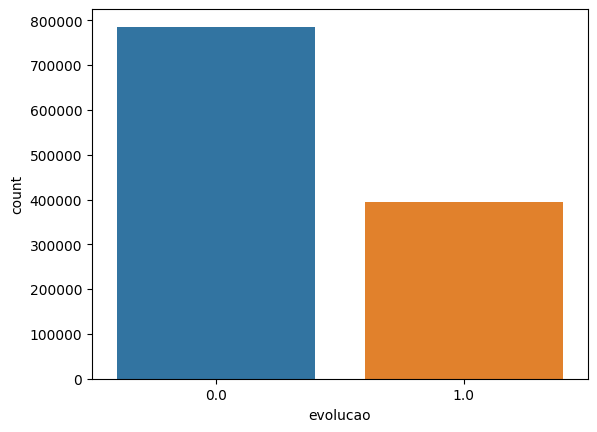

In [ ]:
import seaborn as sns

sns.countplot(x='evolucao', data=df)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['evolucao'])
y = df['evolucao']

X_train, X_test, y_train, y_test = train_test_split(X.values, y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    #'max_depth' : [1, 5, 10],
    #'min_child_weight' : [1, 5, 10],
    #'eta' : [0.1, 0.5, 1.0],
    'n_estimators': [10, 500, 1000, 2000, 3000],
  #'max_features': ['sqrt', 'log2', 2, 5, 8, 13, 21, 34, None]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=parametros,
    scoring='accuracy',
    cv=5
)

grid.fit(X_test, y_test)
print(grid.best_score_)
print(grid.best_params_)

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Importância de cada feature')

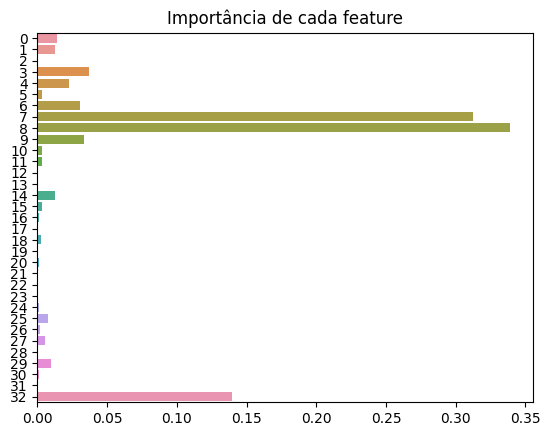

In [ ]:
import seaborn as sns

importances = pd.Series(data=model.feature_importances_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

accuracy: 0.7159774945770065
precision: 0.5898637341620846
recall: 0.49930185968391444
confusion matrix:


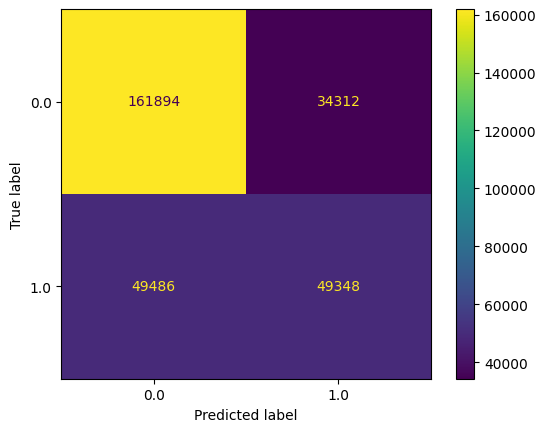

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

prediction = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, prediction))
print("precision:", precision_score(y_test, prediction))
print("recall:", recall_score(y_test, prediction))
cm = confusion_matrix(y_test, prediction, labels=model.classes_)
print("confusion matrix:")
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()